In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

SchoolData = pd.read_csv('SchoolData.csv')
SchoolData_DF = pd.DataFrame(SchoolData)
SchoolData_DF.columns



Index(['School name', 'School rating', 'Size', 'Reduced lunch',
       'State percentile in 2018', 'State percentile in 2019',
       'Type of school', 'Average test score for 2018',
       'Average test score for 2019', 'Fulltime teachers',
       'Percent African American', 'Percent Caucasian', 'Percent Asian',
       'Percent Hispanic'],
      dtype='object')

In [25]:
SchoolData_DF.rename(columns={'School name':'school_Name', 'School rating':'school_rating', 'Size':'size', 'Reduced lunch':'reduced_lunch',
       'State percentile in 2018':'percentile2018', 'State percentile in 2019':'percentile2019',
       'Type of school':'school_type', 'Average test score for 2018':'avg_score2018',
       'Average test score for 2019':'avg_score2019', 'Fulltime teachers':'fulltime_teachers',
       'Percent African American':'percent_african_american', 'Percent Caucasian':'percent_caucasian', 'Percent Asian':'percent_asian',
       'Percent Hispanic':'percent_hispanic'}, inplace=True)
SchoolData_DF.head()


,school_Name,school_rating,size,reduced_lunch,percentile2018,percentile2019,school_type,avg_score2018,avg_score2019,fulltime_teachers,percent_african_american,percent_caucasian,percent_asian,percent_hispanic
0,Amigos School,4.0,419,63,68.8,78.7,Public,69.4,77.8,33,4.5,39.6,2.6,43.4
1,Benjamin Banneker Charter Public School,4.0,354,60,79.7,86.5,"Public, Charter",78.1,83.8,18,83.3,2.0,0.8,11.0
2,Cambridge Rindge and Latin,2.0,1983,1587,42.6,48.3,Public,56.3,55.5,194,29.1,38.0,11.0,14.2
3,Cambridge Street Upper School,2.0,256,231,40.1,41.2,Public,41.5,43.7,33,22.3,43.8,6.6,18.0
4,Cambridgeport,4.0,338,34,67.1,70.8,Public,67.8,71.0,25,16.9,55.9,8.3,7.1


In [22]:
SchoolData_DF.describe()

,School_Rating,Size,Reduced_lunch,Percentile2018,Percentile2019,Avg_Score2018,Avg_Score2019,Fulltime_Teachers,Percent_AfricanAmerican,Percent_Caucasian,Percent_Asian,Percent_Hispanic
count,19.000000,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.210526,443.150000,256.150000,60.621053,63.468421,61.884211,63.910526,41.700000,29.505000,35.760000,12.245000,13.780000
std,1.182227,406.683929,383.414064,20.613199,21.875889,17.933156,19.313262,39.837961,19.389511,16.225075,6.667713,8.472531
min,1.000000,256.000000,15.000000,12.200000,22.500000,16.200000,27.000000,18.000000,4.500000,2.000000,0.800000,5.200000
25%,2.000000,295.000000,50.500000,44.500000,43.800000,49.700000,46.850000,26.750000,18.275000,26.625000,8.175000,8.625000
50%,4.000000,326.500000,136.500000,67.100000,70.700000,67.800000,69.800000,33.000000,22.300000,40.350000,11.500000,11.050000
75%,4.000000,359.500000,259.750000,78.000000,82.150000,77.150000,80.100000,34.250000,31.625000,44.775000,17.125000,16.875000
max,5.000000,1983.000000,1587.000000,86.700000,93.500000,83.100000,89.900000,194.000000,83.300000,58.200000,25.400000,43.400000


In [26]:
SchoolData_DF[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()


reduced_lunch                                                \
                      count        mean         std    min     25%    50%   
school_rating                                                               
1.0                     1.0  283.000000         NaN  283.0  283.00  283.0   
2.0                     6.0  488.666667  539.443664  231.0  239.25  274.5   
3.0                     2.0  218.000000   14.142136  208.0  213.00  218.0   
4.0                     8.0   53.375000   10.239106   34.0   48.50   54.5   
5.0                     2.0   18.000000    4.242641   15.0   16.50   18.0   

                               
                  75%     max  
school_rating                  
1.0            283.00   283.0  
2.0            321.75  1587.0  
3.0            223.00   228.0  
4.0             60.75    65.0  
5.0             19.50    21.0

In [29]:
SchoolData_DF[['reduced_lunch', 'school_rating']].corr()


,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.519946
school_rating,-0.519946,1.000000


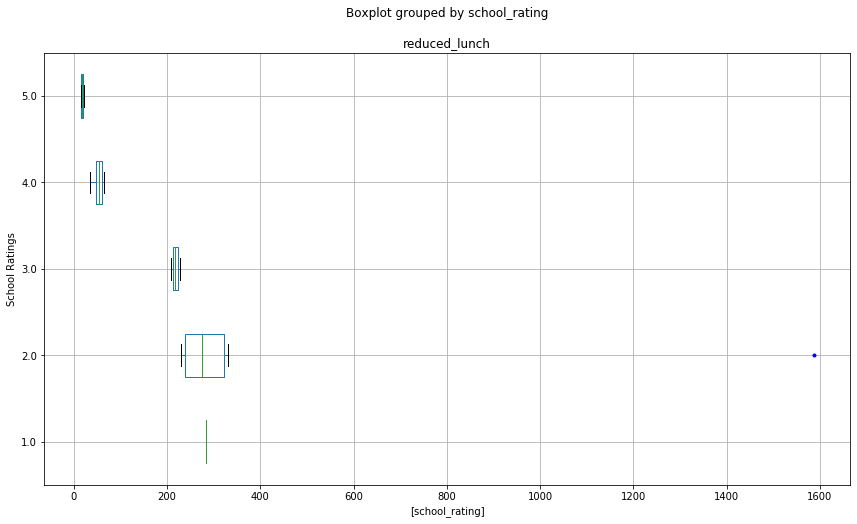

In [36]:
# Create fig and ax variable that define the size of the plot
fig, ax = plt.subplots(figsize=(14,8))
# Label y axis
ax.set_ylabel('School Ratings')
# Create a place holder variable that plots our data on b-w plot, sym
# is a symbol identifier = color blue
# for more information on .boxplot and available arguments google
# pandas .boxplot method
PLOT = SchoolData_DF[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8), vert=False, sym='b. ', ax=ax)


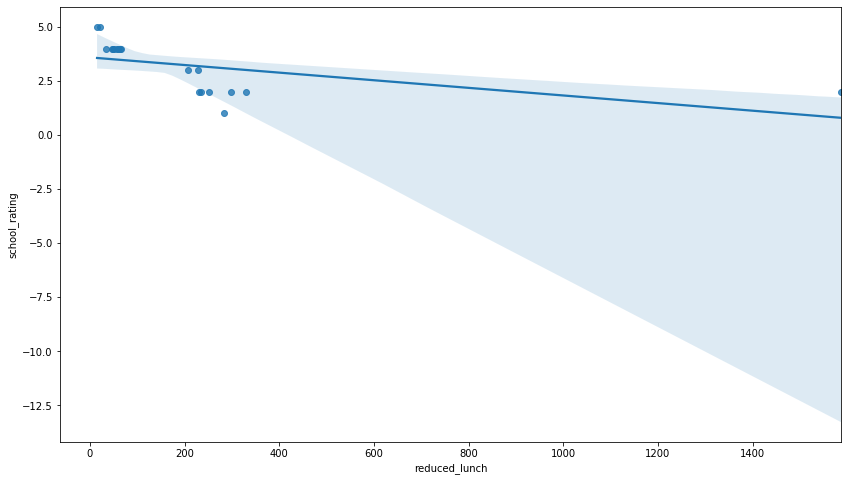

In [39]:
# Set the size of the plot
plt.figure(figsize=(14,8))
# Create plot with a regression line
scat = sb.regplot(data=SchoolData_DF, x='reduced_lunch', y='school_rating')


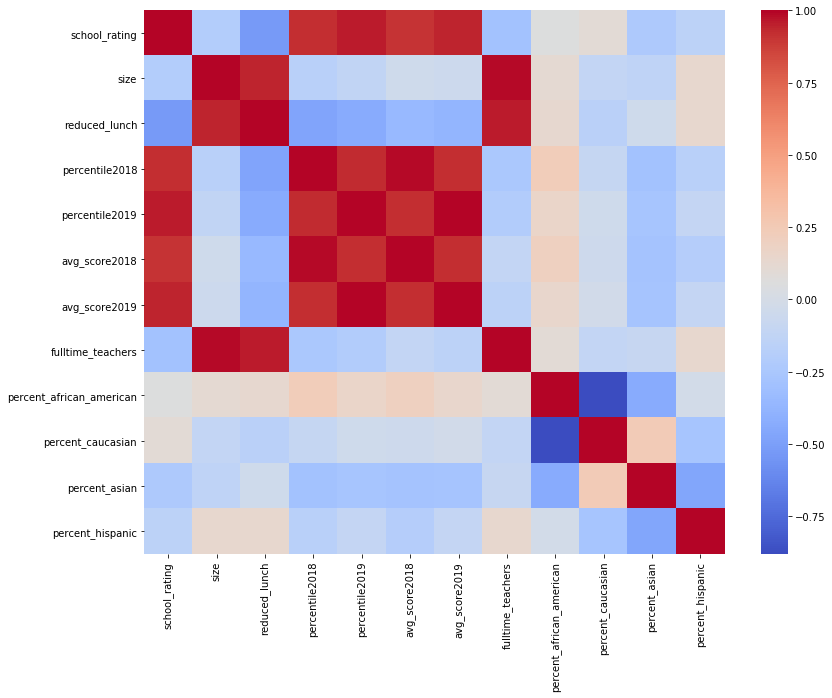

In [40]:
# Create tabular correlation matrix with data
corr = SchoolData_DF.corr()
heat, ax = plt.subplots(figsize=(13,10))
# Plot correlation matrix
heat = sb.heatmap(corr, ax=ax, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap='coolwarm')